In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
%matplotlib inline

In [7]:
pp.style.use('seaborn-white')
sns.set_palette("muted")
plot_size = 6*np.array([1.0,(2.0/(1.0+np.sqrt(5.0)))]) #Use Golden ratio as aspect ratio for plots

In [87]:
# Define functions
def gaussian(x, a, b, c):
    numerator = -np.square(x-b)
    denominator = 2.0*np.square(c)
    return a * np.exp(numerator/denominator)

def print_fit_info(popt, pcov):
    string = 'Constant: {0:.3e} +- {1:.3e} \n\
    Mean: {2:.7f} +- {3:.7f} \n\
   Sigma: {4:.7f} +- {5:.7f}'.format(popt[0], pcov[0,0], popt[1], pcov[1,1], popt[2], pcov[2,2])
    return print(string)

In [91]:
# Qweak Q acceptance [1/fm]
fit_range = (0.5, 1.2)

In [12]:
# Load in data from CSV files.
al_0_844_MeV_state = pd.read_csv("data/al_0.844MeV_excited_state.dat")
al_1_0140_MeV_state = pd.read_csv("data/al_1.0140MeV_excited_state.dat")
al_2_2110_MeV_state = pd.read_csv("data/al_2.2110MeV_excited_state.dat")
al_2_7350_MeV_state = pd.read_csv("data/al_2.7350MeV_excited_state.dat")
al_2_9900_MeV_state = pd.read_csv("data/al_2.9900MeV_excited_state.dat")
al_3_6800_MeV_state = pd.read_csv("data/al_3.6800MeV_excited_state.dat")
al_3_9570_MeV_state = pd.read_csv("data/al_3.9570MeV_excited_state.dat")

In [21]:
# Select "most" forward angle data
al_0_844_MeV_state_Q_eff = al_0_844_MeV_state.Q_eff[al_0_844_MeV_state.theta < 160.0]
al_0_844_MeV_state_ff = al_0_844_MeV_state.f_total_sq[al_0_844_MeV_state.theta < 160.0]

al_1_0140_MeV_state_Q_eff = al_1_0140_MeV_state.Q_eff[al_1_0140_MeV_state.theta < 160.0]
al_1_0140_MeV_state_ff = al_1_0140_MeV_state.f_total_sq[al_1_0140_MeV_state.theta < 160.0]

al_2_2110_MeV_state_Q_eff = al_2_2110_MeV_state.Q_eff[al_2_2110_MeV_state.theta < 160.0]
al_2_2110_MeV_state_ff = al_2_2110_MeV_state.f_total_sq[al_2_2110_MeV_state.theta < 160.0]

al_2_7350_MeV_state_Q_eff = al_2_7350_MeV_state.Q_eff[al_2_7350_MeV_state.theta < 160.0]
al_2_7350_MeV_state_ff = al_2_7350_MeV_state.f_total_sq[al_2_7350_MeV_state.theta < 160.0]

al_2_9900_MeV_state_Q_eff = al_2_9900_MeV_state.Q_eff[al_2_9900_MeV_state.theta < 160.0]
al_2_9900_MeV_state_ff = al_2_9900_MeV_state.f_total_sq[al_2_9900_MeV_state.theta < 160.0]

al_3_6800_MeV_state_Q_eff = al_3_6800_MeV_state.Q_eff[al_3_6800_MeV_state.theta < 160.0]
al_3_6800_MeV_state_ff = al_3_6800_MeV_state.f_total_sq[al_3_6800_MeV_state.theta < 160.0]

al_3_9570_MeV_state_Q_eff = al_3_9570_MeV_state.Q_eff[al_3_9570_MeV_state.theta < 160.0]
al_3_9570_MeV_state_ff = al_3_9570_MeV_state.f_total_sq[al_3_9570_MeV_state.theta < 160.0]


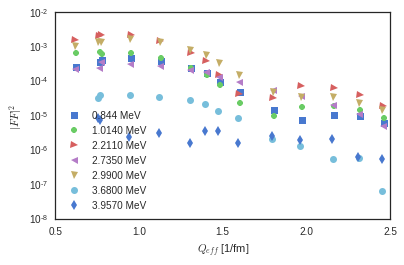

In [27]:
pp.figure(figsize=plot_size)
pp.errorbar(al_0_844_MeV_state_Q_eff, al_0_844_MeV_state_ff, ls='None', marker='s', label='0.844 MeV')
pp.errorbar(al_1_0140_MeV_state_Q_eff, al_1_0140_MeV_state_ff, ls='None', marker='8', label='1.0140 MeV')
pp.errorbar(al_2_2110_MeV_state_Q_eff, al_2_2110_MeV_state_ff, ls='None', marker='>', label='2.2110 MeV')
pp.errorbar(al_2_7350_MeV_state_Q_eff, al_2_7350_MeV_state_ff, ls='None', marker='<', label='2.7350 MeV')
pp.errorbar(al_2_9900_MeV_state_Q_eff, al_2_9900_MeV_state_ff, ls='None', marker='v', label='2.9900 MeV')
pp.errorbar(al_3_6800_MeV_state_Q_eff, al_3_6800_MeV_state_ff, ls='None', marker='o', label='3.6800 MeV')
pp.errorbar(al_3_9570_MeV_state_Q_eff, al_3_9570_MeV_state_ff, ls='None', marker='d', label='3.9570 MeV')
pp.yscale('log')
pp.xlabel('$Q_{eff}$ [1/fm]')
pp.ylabel('$|FF|^{2}$')
pp.legend(loc='lower left')
pp.show()

In [98]:
# Fit Gaussian function to specified range
al_0_844_MeV_popt, al_0_844_MeV_pcov = curve_fit(gaussian, 
                                                 al_0_844_MeV_state_Q_eff_cut, 
                                                 al_0_844_MeV_state_ff)
al_1_0140_MeV_popt, al_1_0140_MeV_pcov = curve_fit(gaussian, 
                                                   al_1_0140_MeV_state_Q_eff_cut, 
                                                   al_1_0140_MeV_state_ff)
al_2_2110_MeV_popt, al_2_2110_MeV_pcov = curve_fit(gaussian, 
                                                   al_2_2110_MeV_state_Q_eff_cut, 
                                                   al_2_2110_MeV_state_ff)
al_2_7350_MeV_popt, al_2_7350_MeV_pcov = curve_fit(gaussian, 
                                                   al_2_7350_MeV_state_Q_eff_cut, 
                                                   al_2_7350_MeV_state_ff)
al_2_9900_MeV_popt, al_2_9900_MeV_pcov = curve_fit(gaussian, 
                                                   al_2_9900_MeV_state_Q_eff_cut, 
                                                   al_2_9900_MeV_state_ff)
al_3_6800_MeV_popt, al_3_6800_MeV_pcov = curve_fit(gaussian, 
                                                   al_3_6800_MeV_state_Q_eff_cut, 
                                                   al_3_6800_MeV_state_ff)
#al_3_9570_MeV_popt, al_3_9570_MeV_pcov = curve_fit(gaussian, al_3_9570_MeV_state_Q_eff, al_3_9570_MeV_state_ff)

ValueError: operands could not be broadcast together with shapes (5,) (14,) 

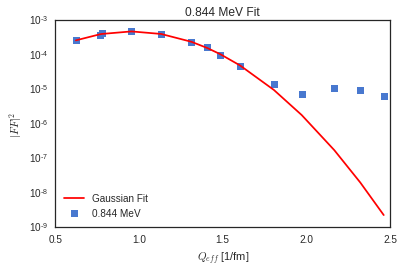

Constant: 4.794e-04 +- 8.238e-11 
    Mean: 0.9552426 +- 0.0000442 
   Sigma: 0.3042696 +- 0.0000570


In [88]:
# 0.844 MeV Data/Fit Comparison
pp.figure(figsize=plot_size)
pp.errorbar(al_0_844_MeV_state_Q_eff, al_0_844_MeV_state_ff, ls='None', marker='s', label='0.844 MeV')
pp.plot(al_0_844_MeV_state_Q_eff, gaussian(al_0_844_MeV_state_Q_eff, *popt), 'r-', label='Gaussian Fit')
pp.yscale('log')
pp.title('0.844 MeV Fit')
pp.xlabel('$Q_{eff}$ [1/fm]')
pp.ylabel('$|FF|^{2}$')
pp.legend(loc='lower left')
pp.show()
print_fit_info(al_0_844_MeV_popt[:],al_0_844_MeV_pcov[:])

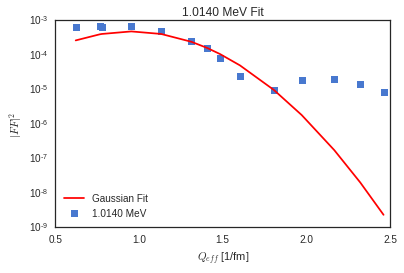

Constant: 7.090e-04 +- 2.958e-10 
    Mean: 0.8083745 +- 0.0004188 
   Sigma: 0.3481434 +- 0.0003420


In [89]:
# 1.014 MeV Data/Fit Comparison
pp.figure(figsize=plot_size)
pp.errorbar(al_1_0140_MeV_state_Q_eff, al_1_0140_MeV_state_ff, ls='None', marker='s', label='1.0140 MeV')
pp.plot(al_1_0140_MeV_state_Q_eff, gaussian(al_1_0140_MeV_state_Q_eff, *popt), 'r-', label='Gaussian Fit')
pp.yscale('log')
pp.title('1.0140 MeV Fit')
pp.xlabel('$Q_{eff}$ [1/fm]')
pp.ylabel('$|FF|^{2}$')
pp.legend(loc='lower left')
pp.show()
print_fit_info(al_1_0140_MeV_popt[:],al_1_0140_MeV_pcov[:])

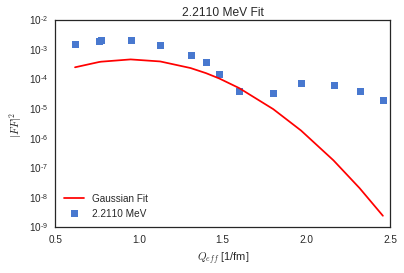

Constant: 2.286e-03 +- 1.370e-09 
    Mean: 0.8674033 +- 0.0000467 
   Sigma: 0.2833412 +- 0.0000519


In [90]:
# 2.2110 MeV Data/Fit Comparison
pp.figure(figsize=plot_size)
pp.errorbar(al_2_2110_MeV_state_Q_eff, al_2_2110_MeV_state_ff, ls='None', marker='s', label='2.2110 MeV')
pp.plot(al_2_2110_MeV_state_Q_eff, gaussian(al_2_2110_MeV_state_Q_eff, *popt), 'r-', label='Gaussian Fit')
pp.yscale('log')
pp.title('2.2110 MeV Fit')
pp.xlabel('$Q_{eff}$ [1/fm]')
pp.ylabel('$|FF|^{2}$')
pp.legend(loc='lower left')
pp.show()
print_fit_info(al_2_2110_MeV_popt[:],al_2_2110_MeV_pcov[:])

In [97]:
al_0_844_MeV_state_Q_eff[(al_0_844_MeV_state_Q_eff > fit_range[0]) & (al_0_844_MeV_state_Q_eff < fit_range[1])]

0     0.623
2     0.766
3     0.779
6     0.955
10    1.132
Name: Q_eff, dtype: float64